# Data Analysis on Discoveries of Species

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib.animation import FuncAnimation
from scipy.cluster.vq import vq, kmeans, whiten
pd.set_option('display.max_columns', None)
import random

### Import Dataset

There are 50 Columns and 100000 Data points in the csv file

In [2]:
data=pd.read_csv('dataset_4.csv')
data.shape

(100000, 50)

### Data Cleaning

Firstly we will check for the missing values in each column after that we remove those column containing missing values larger than 10% which will reduce the size of data significantly and mostly leaves with categorical and texts data. 

In [3]:
most_na_cols=(data.isna().sum()/data.shape[0]*100)>10
print(most_na_cols[most_na_cols.values==True].index)
data_cleaned=data.loc[:,~most_na_cols]
data_cleaned=data_cleaned.dropna(axis=0)
data_cleaned.head(5)
data_cleaned.shape

Index(['infraspecificEpithet', 'verbatimScientificNameAuthorship', 'locality',
       'individualCount', 'coordinateUncertaintyInMeters',
       'coordinatePrecision', 'elevation', 'elevationAccuracy', 'depth',
       'depthAccuracy', 'recordNumber', 'typeStatus', 'establishmentMeans'],
      dtype='object')


(90184, 37)

### Show location of Discoveries

Plotting the latitude and longitude data on the world map to take a look from where we are getting most of the discoveries.

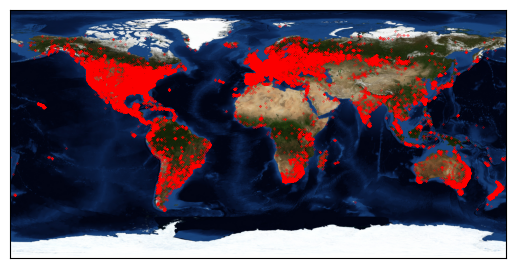

In [4]:
lat=data_cleaned.decimalLatitude
lon=data_cleaned.decimalLongitude
m = Basemap()
m.bluemarble()
m.plot(lon,lat,'.',markersize=0.5,color='r')
plt.show()

### Plotting kindom wise location on map

found out that the distribution of the Animalia is the most followed by Plantae.

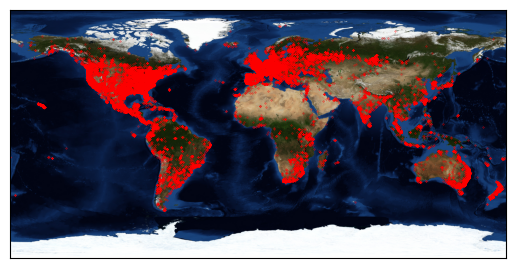

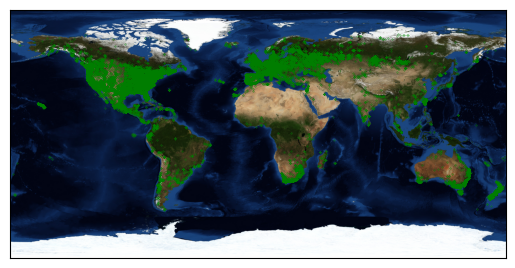

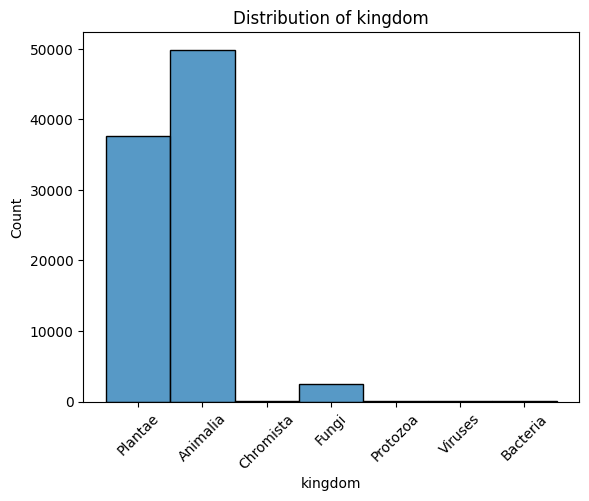

In [5]:
m = Basemap()
m.bluemarble()
m.plot(lon[data_cleaned.kingdom=="Animalia"],lat[data_cleaned.kingdom=="Animalia"],'.',markersize=0.5,color='r')
plt.show()

m = Basemap()
m.bluemarble()
m.plot(lon[data_cleaned.kingdom=="Plantae"],lat[data_cleaned.kingdom=="Plantae"],'.',markersize=0.5,color='g')
plt.show()

sns.histplot(data_cleaned.kingdom)
plt.xticks(rotation=45)
plt.title('Distribution of kingdom')
plt.show()

### Animate trend of species discovered

How the species discovered in every year?

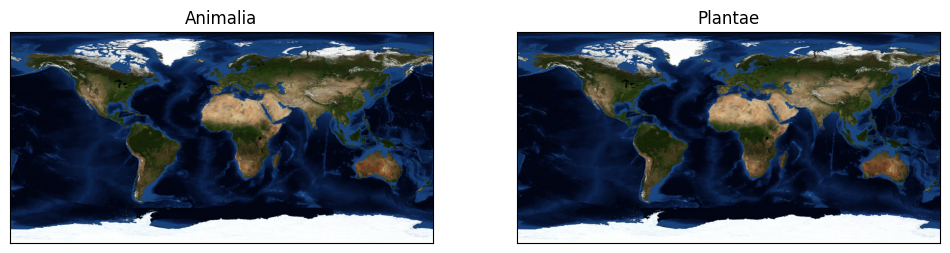

In [6]:
lat=data_cleaned.decimalLatitude
lon=data_cleaned.decimalLongitude
yrs=data_cleaned.year.sort_values().unique()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
m1 = Basemap(ax=ax1)
m1.bluemarble()
m2 = Basemap(ax=ax2)
m2.bluemarble()

scatter1, = ax1.plot([],[],'.', markersize=1,color='r')
ax1.set_title("Animalia")
scatter2, = ax2.plot([],[],'.', markersize=1,color='b')
ax2.set_title("Plantae")

def init():
    scatter1.set_data([],[])
    scatter2.set_data([],[])
    return scatter1,scatter2

def update(i):
    # Update scatter plot
    scatter1.set_data(lon[(data_cleaned.loc[:,'kingdom']=="Animalia") & (data_cleaned.loc[:,'year']==i)],lat[(data_cleaned.loc[:,'kingdom']=="Animalia") & (data_cleaned.loc[:,'year']==i)])
    scatter2.set_data(lon[(data_cleaned.loc[:,'kingdom']=="Plantae") & (data_cleaned.loc[:,'year']==i)],lat[(data_cleaned.loc[:,'kingdom']=="Plantae") & (data_cleaned.loc[:,'year']==i)])
    fig.suptitle(f'Year: {i}')
    return scatter1,scatter2
ani = FuncAnimation(fig,update,frames=yrs, init_func=init, blit=True, interval=250)
plt.show()
ani.save('op.gif')


<figure>
        <img src="op.gif">
</figure>

### Let's Conduct analysis for Country India

* Distribution of animalia kindom is more.
* Among those kingdom Arthropoda and Chordata is the mostly found in phylum and Insecta and Aves found in class.
* The count of discovery in each year increases exponentially.
* In india Maharashtra, kerala and Karnataka contribute is more. 

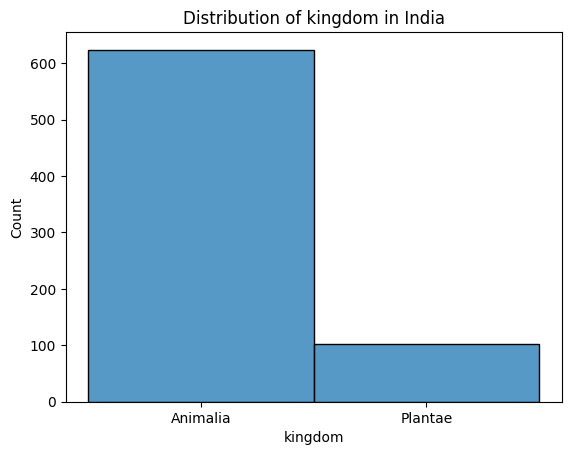

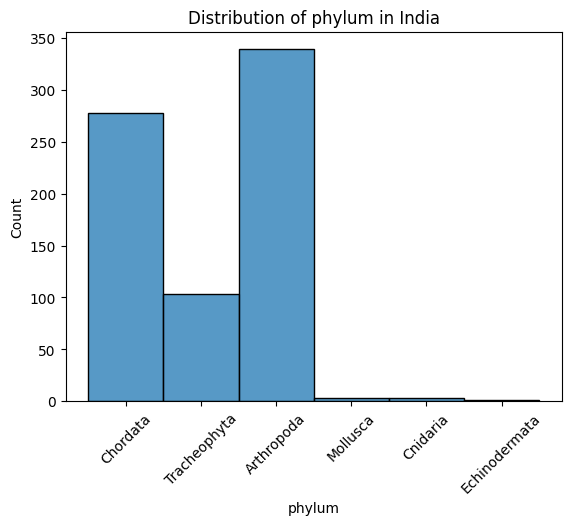

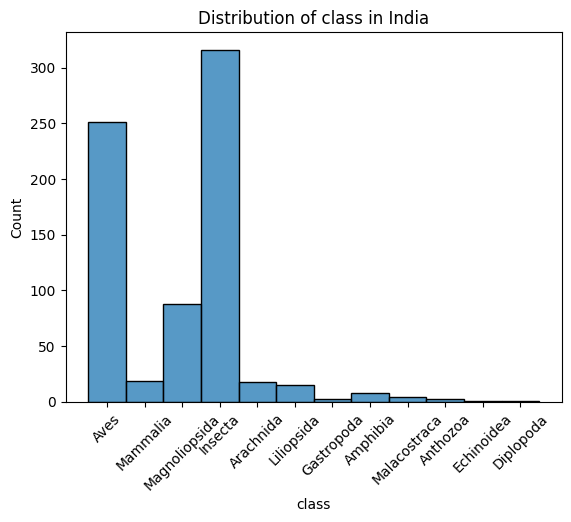

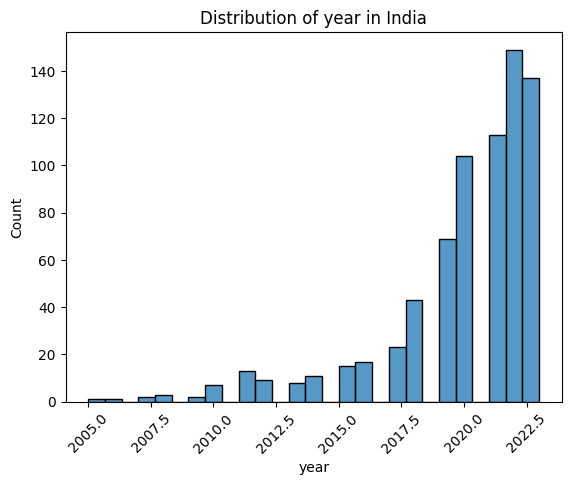

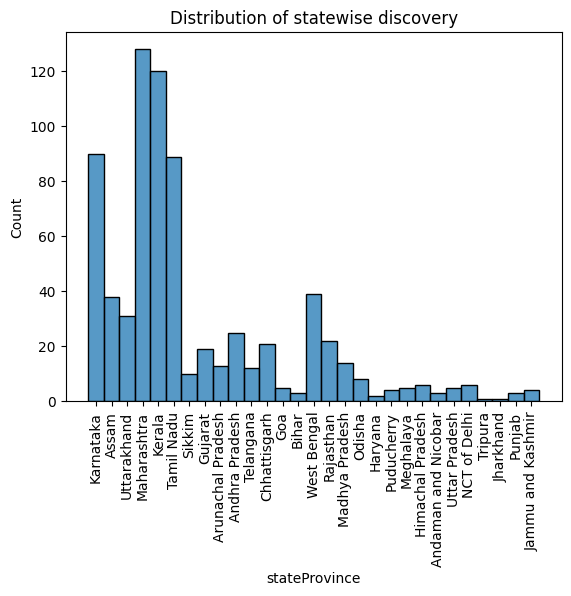

In [7]:
data_india=data_cleaned[data_cleaned.countryCode=="IN"]

sns.histplot(data_india['kingdom'])
plt.title('Distribution of kingdom in India')
plt.show()

sns.histplot(data_india['phylum'])
plt.xticks(rotation=45)
plt.title('Distribution of phylum in India')
plt.show()

sns.histplot(data_india['class'])
plt.xticks(rotation=45)
plt.title('Distribution of class in India')
plt.show()

sns.histplot(data_india['year'])
plt.xticks(rotation=45)
plt.title('Distribution of year in India')
plt.show()

sns.histplot(data_india['stateProvince'])
plt.xticks(rotation='vertical')
plt.title('Distribution of statewise discovery')
plt.show()

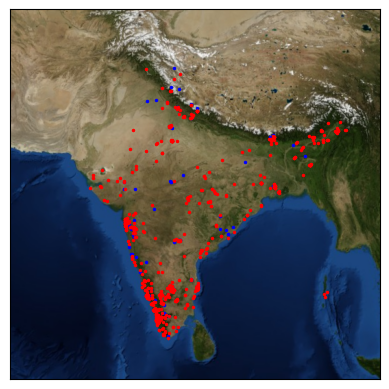

In [8]:
lat=data_india.decimalLatitude
lon=data_india.decimalLongitude
m = Basemap(projection='lcc',lat_0=22,lon_0=80,width=4E6,height=4E6)
m.bluemarble(scale=1)
x,y=m(lon[data_india.kingdom=="Plantae"],lat[data_india.kingdom=="Plantae"])
m.plot(x,y,'.',color='b',markersize=3)
x,y=m(lon[data_india.kingdom=="Animalia"],lat[data_india.kingdom=="Animalia"])
m.plot(x,y,'.',color='r',markersize=3)
plt.show()

### Animate trend of discovered species in India

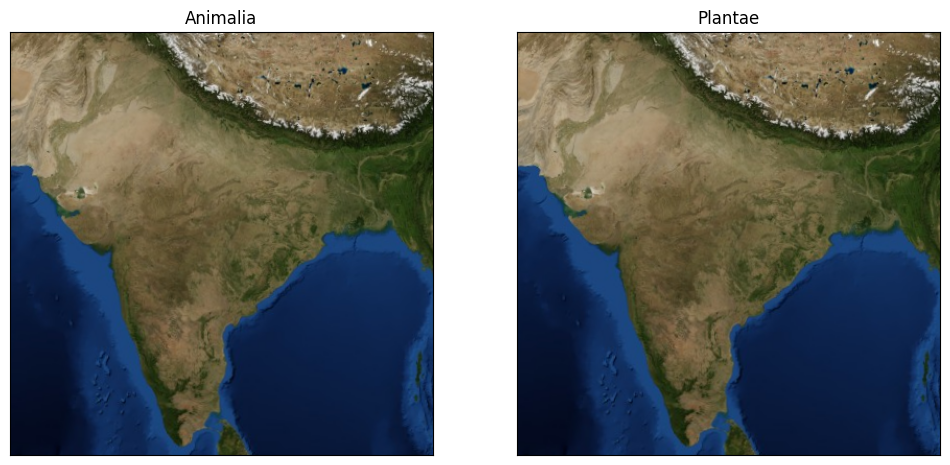

/home/kunalgokhe/.local/lib/python3.12/site-packages/pyproj/transformer.py:820: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return self._transformer._transform_point(


In [9]:
lat=data_india.decimalLatitude
lon=data_india.decimalLongitude
yrs=data_india.year.sort_values().unique()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
m1 = Basemap(ax=ax1,projection='lcc',lat_0=21,lon_0=80,width=3E6,height=3E6)
m1.bluemarble()
m2 = Basemap(ax=ax2,projection='lcc',lat_0=21,lon_0=80,width=3E6,height=3E6)
m2.bluemarble()

scatter1, = ax1.plot([],[],'.', markersize=2,color='r')
ax1.set_title("Animalia")
scatter2, = ax2.plot([],[],'.', markersize=2,color='b')
ax2.set_title("Plantae")

def init():
    scatter1.set_data([],[])
    scatter2.set_data([],[])
    return scatter1,scatter2

def update(i):
    # Update scatter plot
    x,y=m1(lon[(data_india.loc[:,'kingdom']=="Animalia") & (data_india.loc[:,'year']==i)],lat[(data_india.loc[:,'kingdom']=="Animalia") & (data_india.loc[:,'year']==i)])
    scatter1.set_data(x,y)
    x,y=m2(lon[(data_india.loc[:,'kingdom']=="Plantae") & (data_india.loc[:,'year']==i)],lat[(data_india.loc[:,'kingdom']=="Plantae") & (data_india.loc[:,'year']==i)])
    scatter2.set_data(x,y)
    fig.suptitle(f'Year: {i}')
    return scatter1,scatter2
ani = FuncAnimation(fig,update,frames=yrs, init_func=init, blit=True, interval=500)
plt.show()
ani.save('op2.gif')

<figure>
        <img src="op2.gif">
</figure>

### Top 3 states which discovers most species are Maharashtra, Kerala and Karnataka

### Analysis for Maharashtra
* Discover of species in each year growths exponentially.
* mostly found kindom was Animalia and phylum is arthropoda.
* Using clustering to find the cluster which gives the dense region where the discoveries are more, found out that cities are Mumbai, pune and Nagpur.

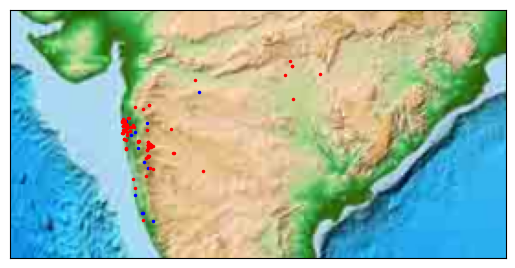

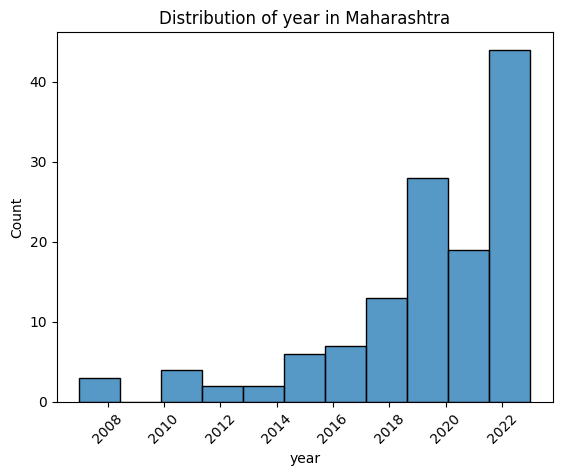

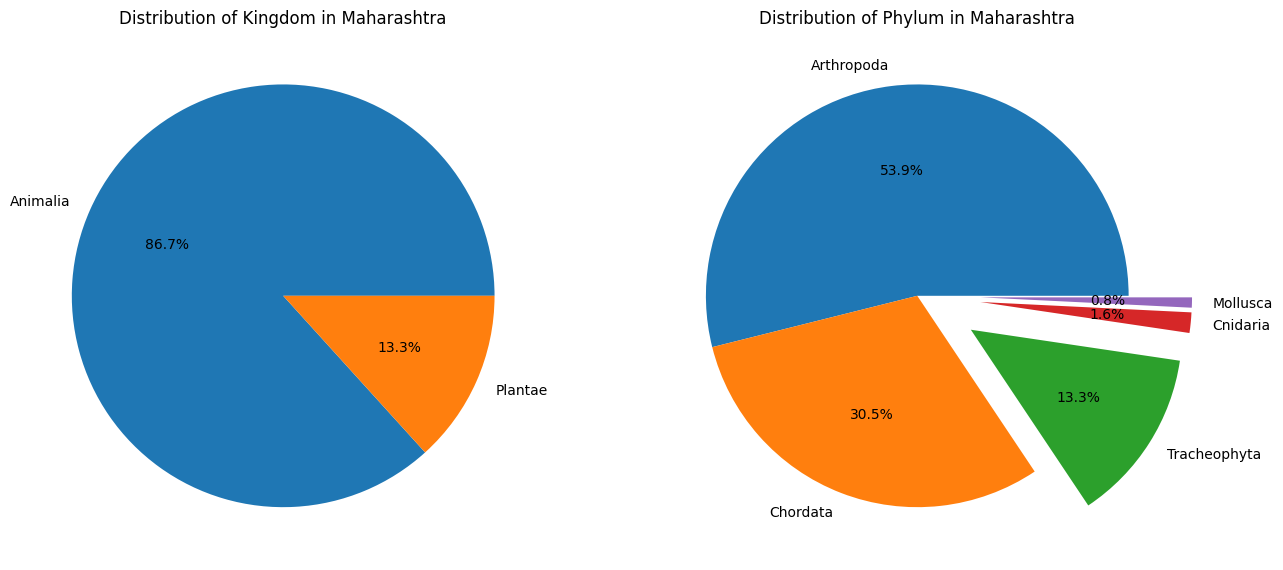

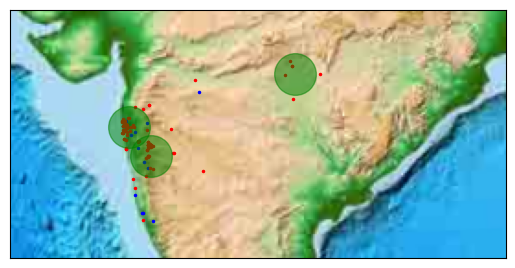

In [10]:
lat=data_india.decimalLatitude[data_india.stateProvince=="Maharashtra"]
lon=data_india.decimalLongitude[data_india.stateProvince=="Maharashtra"]
m = Basemap(projection='lcc',lat_0=19,lon_0=78,width=2E6,height=1E6)
m.etopo(scale=1)
x,y=m(lon[data_india.kingdom=="Plantae"],lat[data_india.kingdom=="Plantae"])
m.plot(x,y,'.',color='b',markersize=3)

x,y=m(lon[data_india.kingdom=="Animalia"],lat[data_india.kingdom=="Animalia"])
m.plot(x,y,'.',color='r',markersize=3)
plt.show()

sns.histplot(data_india[data_india.stateProvince=="Maharashtra"]['year'])
plt.xticks(rotation=45)
plt.title('Distribution of year in Maharashtra')
plt.show()

fig=plt.figure(figsize=(15,30))
plt.subplot(1,2,1)
tempdata=data_india[data_india.stateProvince=="Maharashtra"]['kingdom']
plt.pie(tempdata.value_counts().values/tempdata.shape[0],labels=tempdata.unique(),autopct='%.1f%%')
plt.title('Distribution of Kingdom in Maharashtra')

plt.subplot(1,2,2)
tempdata=data_india[data_india.stateProvince=="Maharashtra"]['phylum']
plt.pie(tempdata.value_counts().values/tempdata.shape[0],labels=tempdata.unique(),autopct='%.1f%%',explode=[0,0,0.3,0.3,0.3])
plt.title('Distribution of Phylum in Maharashtra')
plt.show()

lat=data_india.decimalLatitude[data_india.stateProvince=="Maharashtra"]
lon=data_india.decimalLongitude[data_india.stateProvince=="Maharashtra"]
m = Basemap(projection='lcc',lat_0=19,lon_0=78,width=2E6,height=1E6)
m.etopo(scale=1)
x,y=m(lon[data_india.kingdom=="Plantae"],lat[data_india.kingdom=="Plantae"])
m.plot(x,y,'.',color='b',markersize=3)

x,y=m(lon[data_india.kingdom=="Animalia"],lat[data_india.kingdom=="Animalia"])
m.plot(x,y,'.',color='r',markersize=3)

np.random.seed(1)
feature=np.array([lat,lon]).T
locs=kmeans(feature,3)[0]
x,y=m(locs[:,1],locs[:,0])
m.plot(x,y,'o',color='g',markersize=30,alpha=0.5)
plt.show()

### Let's Conduct Analysis for Pune

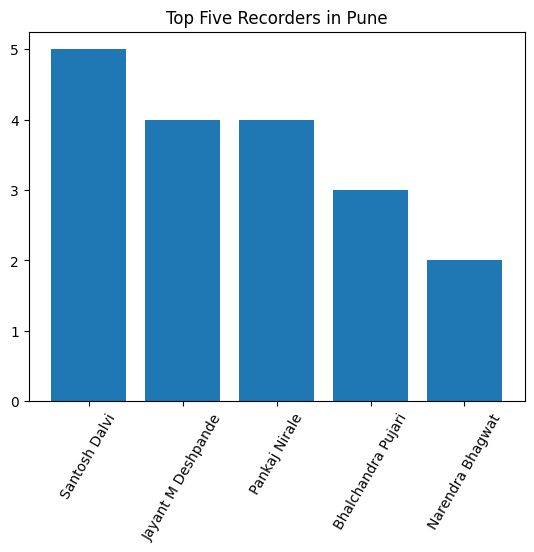

In [11]:
Idx=np.sqrt((lat-locs[2,0])**2+(lon-locs[2,1])**2)<1
data = data_india.recordedBy[data_india.stateProvince=="Maharashtra"][Idx].value_counts()
plt.bar(data.index[0:5],data.values[0:5])
plt.xticks(rotation=60)
plt.title('Top Five Recorders in Pune')
plt.show()

### So, What kind of species discovered by Bhalchandra Pujari sir and Where?

In [12]:
data_india.loc[:,['kingdom','phylum','species','year','decimalLatitude','decimalLongitude']][data_india.recordedBy=='Bhalchandra Pujari']

,kingdom,phylum,species,year,decimalLatitude,decimalLongitude
9458,Plantae,Tracheophyta,Punica granatum,2019,18.553859,73.825159
44859,Animalia,Arthropoda,Maliattha quadripartita,2020,18.555318,73.821740
78258,Plantae,Tracheophyta,Tridax procumbens,2023,18.548139,73.829409


**Species: Punica granatum     &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   Location: In front of SPPU Main Building Office**\
**Species: Maliattha quadripartita &nbsp; Location: Teachers Quarters SPPU Q Building**\
**Species: Tridax procumbens    &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   Location: Near SCMS Department/Food Mall**

### Analysis for Kerala
* Discover of species in each year growths exponentially with higher rate than in maharashtra.
* mostly found kindom was Animalia and 50% phylum is arthropoda.
* Using clustering to find the cluster which gives the dense region where the discoveries are more, found out that cities are Kochi and Kannur.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000000000002].


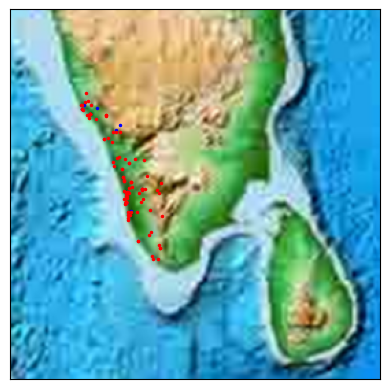

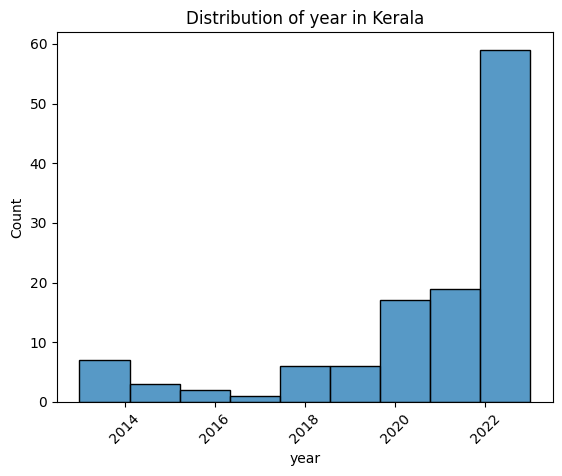

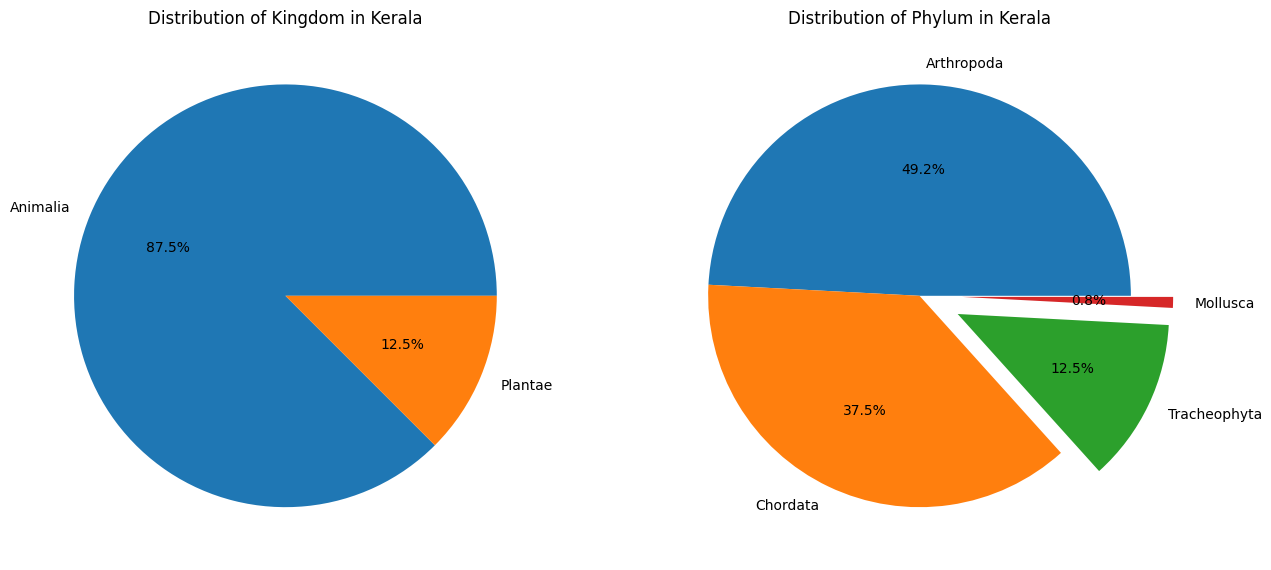

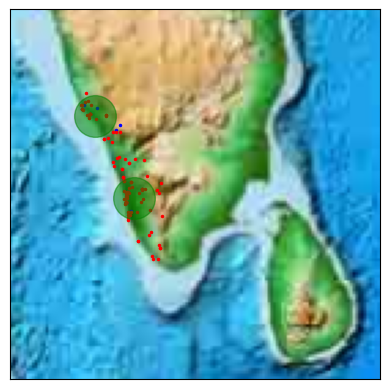

In [13]:
lat=data_india.decimalLatitude[data_india.stateProvince=="Kerala"]
lon=data_india.decimalLongitude[data_india.stateProvince=="Kerala"]
m = Basemap(projection='lcc',lat_0=10,lon_0=78,width=1E6,height=1E6)
m.etopo(scale=2)
x,y=m(lon[data_india.kingdom=="Plantae"],lat[data_india.kingdom=="Plantae"])
m.plot(x,y,'.',color='b',markersize=3)

x,y=m(lon[data_india.kingdom=="Animalia"],lat[data_india.kingdom=="Animalia"])
m.plot(x,y,'.',color='r',markersize=3)
plt.show()

sns.histplot(data_india[data_india.stateProvince=="Kerala"]['year'])
plt.xticks(rotation=45)
plt.title('Distribution of year in Kerala')
plt.show()


fig=plt.figure(figsize=(15,30))
plt.subplot(1,2,1)
tempdata=data_india[data_india.stateProvince=="Kerala"]['kingdom']
plt.pie(tempdata.value_counts().values/tempdata.shape[0],labels=tempdata.unique(),autopct='%.1f%%')
plt.title('Distribution of Kingdom in Kerala')

plt.subplot(1,2,2)
tempdata=data_india[data_india.stateProvince=="Kerala"]['phylum']
plt.pie(tempdata.value_counts().values/tempdata.shape[0],labels=tempdata.unique(),autopct='%.1f%%',explode=[0,0,0.2,0.2])
plt.title('Distribution of Phylum in Kerala')
plt.show()

lat=data_india.decimalLatitude[data_india.stateProvince=="Kerala"]
lon=data_india.decimalLongitude[data_india.stateProvince=="Kerala"]
m = Basemap(projection='lcc',lat_0=10,lon_0=78,width=1E6,height=1E6)
m.etopo(scale=1)
x,y=m(lon[data_india.kingdom=="Plantae"],lat[data_india.kingdom=="Plantae"])
m.plot(x,y,'.',color='b',markersize=3)

x,y=m(lon[data_india.kingdom=="Animalia"],lat[data_india.kingdom=="Animalia"])
m.plot(x,y,'.',color='r',markersize=3)

feature=np.array([lat,lon]).T
locs=kmeans(feature,2)[0]
x,y=m(locs[:,1],locs[:,0])
m.plot(x,y,'o',color='g',markersize=30,alpha=0.5)

plt.show()

### Analysis for Karnataka
* Discover of species in each year growths exponentially.
* mostly found 85% kindom was Animalia and 51% phylum is Chordata.
* Using clustering to find the cluster which gives the dense region where the discoveries are more, found out that cities are Benguluru, Mysuru and Mangaluru.

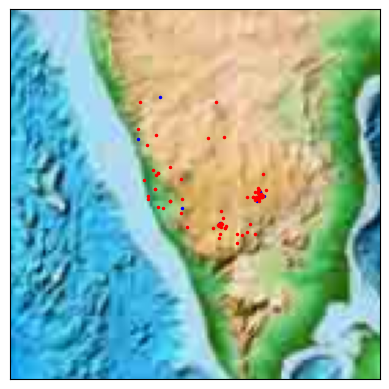

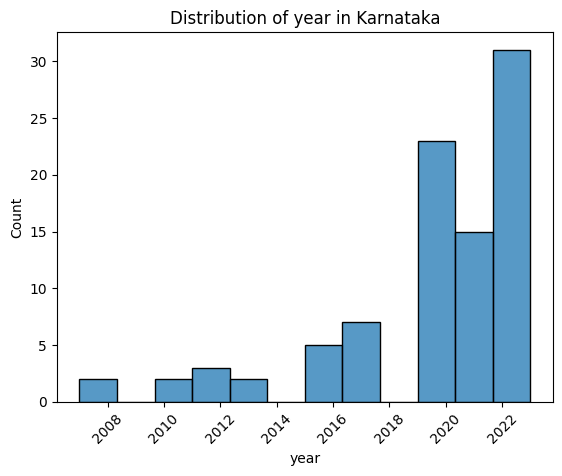

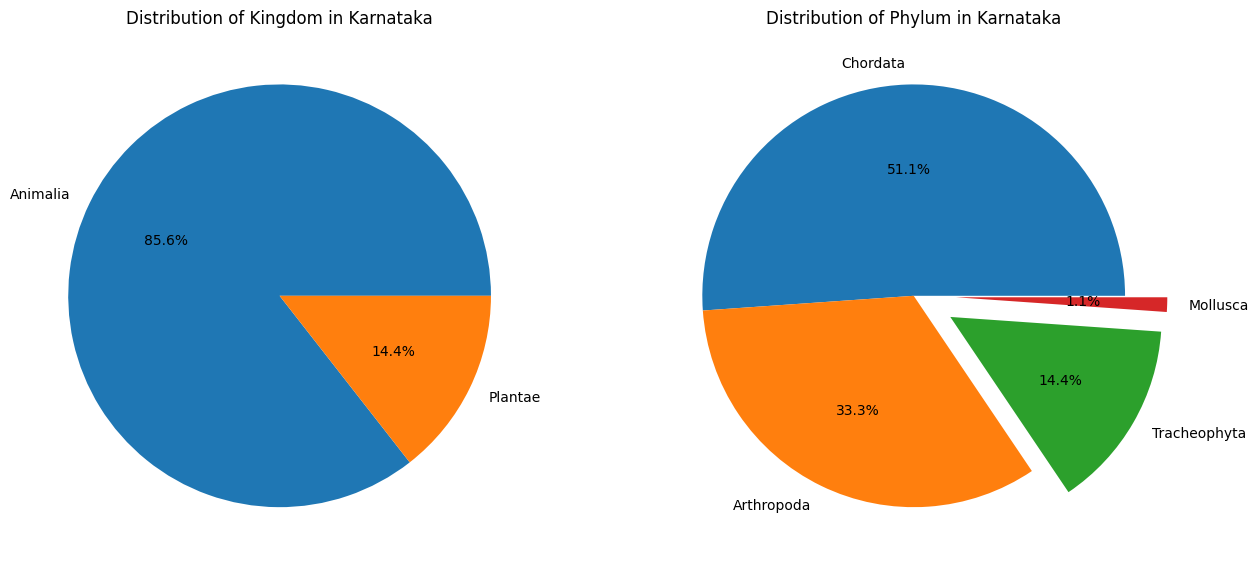

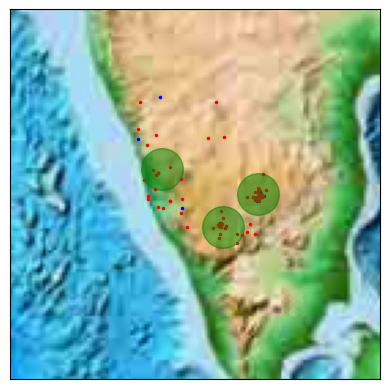

In [14]:
lat=data_india.decimalLatitude[data_india.stateProvince=="Karnataka"]
lon=data_india.decimalLongitude[data_india.stateProvince=="Karnataka"]
m = Basemap(projection='lcc',lat_0=13,lon_0=76,width=1E6,height=1E6)
m.etopo(scale=1)
x,y=m(lon[data_india.kingdom=="Plantae"],lat[data_india.kingdom=="Plantae"])
m.plot(x,y,'.',color='b',markersize=3)

x,y=m(lon[data_india.kingdom=="Animalia"],lat[data_india.kingdom=="Animalia"])
m.plot(x,y,'.',color='r',markersize=3)
plt.show()

sns.histplot(data_india[data_india.stateProvince=="Karnataka"]['year'])
plt.xticks(rotation=45)
plt.title('Distribution of year in Karnataka')
plt.show()

fig=plt.figure(figsize=(15,30))
plt.subplot(1,2,1)
tempdata=data_india[data_india.stateProvince=="Karnataka"]['kingdom']
plt.pie(tempdata.value_counts().values/tempdata.shape[0],labels=tempdata.unique(),autopct='%.1f%%')
plt.title('Distribution of Kingdom in Karnataka')

plt.subplot(1,2,2)
tempdata=data_india[data_india.stateProvince=="Karnataka"]['phylum']
plt.pie(tempdata.value_counts().values/tempdata.shape[0],labels=tempdata.unique(),autopct='%.1f%%',explode=[0,0,0.2,0.2])
plt.title('Distribution of Phylum in Karnataka')
plt.show()

lat=data_india.decimalLatitude[data_india.stateProvince=="Karnataka"]
lon=data_india.decimalLongitude[data_india.stateProvince=="Karnataka"]
m = Basemap(projection='lcc',lat_0=13,lon_0=76,width=1E6,height=1E6)
m.etopo(scale=1)
x,y=m(lon[data_india.kingdom=="Plantae"],lat[data_india.kingdom=="Plantae"])
m.plot(x,y,'.',color='b',markersize=3)

x,y=m(lon[data_india.kingdom=="Animalia"],lat[data_india.kingdom=="Animalia"])
m.plot(x,y,'.',color='r',markersize=3)

feature=np.array([lat,lon]).T
locs=kmeans(feature,3)[0]
x,y=m(locs[:,1],locs[:,0])
m.plot(x,y,'o',color='g',markersize=30,alpha=0.5)

plt.show()